# Predicting Wine Quality


In this project, we will bw using Kaggle’s Red Wine Quality dataset to build a classification models to predict whether a particular red wine is "good quality" or "average quality" or "bad quality". Each wine in this dataset is given a “quality” score between 0 and 10. For the purpose of this project, I converted the output to a multivibrate output where each wine is either “good quality” (a score of 7 or higher) or "average quality" (a score between 5 and 7) and "bad quality" (a score of 4 or less). The quality of a wine is determined by 11 input variables:

1.    Fixed acidity
2.    Volatile acidity
2.    Citric acid
4.    Residual sugar
5.    Chlorides
6.    Free sulfur dioxide
7.    Total sulfur dioxide
8.    Density
9.    pH
10.    Sulfates
11.    Alcohol

#### Objective:
* To build a roboust classifier to determine the quality of red-wine.

#### Main challange:
* This dataset is heavily imbalanced.


<img src="./wine2.jpg" >

* Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

* Importing and exploring the dataset.

In [2]:
#Loading the dataset to the variable 'wine'
wine=pd.read_csv("winequality-red.csv")

In [3]:
#checking the head of the dataset
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# Now we will create a column called "class" which will indicate the Quality of wine.

def get_class(x):
    if x>=7:
        return 'Good'
    elif x>=5:
        return 'Average'
    else:
        return 'Bad'
    
wine['class']=wine['quality'].apply(get_class)

In [5]:
#As we have created catagories from the 'quality' feature so we have to drop it.
wine.drop(labels=['quality'],inplace=True,axis=1)

In [6]:
#Again check the head of the dataset
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,class
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Average
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Average
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Average
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Average
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Average


In [7]:
# Now let's count the number of observations per catagory
wine['class'].value_counts()

Average    1319
Good        217
Bad          63
Name: class, dtype: int64

Here we can see that the dataset is heavily imbalanced. There are lot of observations from the 'Average' catagory, a little from 'Good' catagory and very leass observations from 'Bad' catagory.

This imbalance in the dataset will affect the performance of the classifier a lot. Actually the classifier will achive higher accuracy by predicting more 'Average' class as most of the observations belong to that class.

* To solve this problem there are many differnt approaches. We will go with the oversampling method. 

* Motivated by SMOTE, He et al. (2009) propose the Adaptive Synthetic sampling (ADASYN) technique and receive wide attention.

* ADASYN generates samples of the minority class according to their density distributions. More synthetic data is generated for minority class samples that are harder to learn, compared to those minority samples that are easier to learn. It calculates the K-nearest neighbors of each minority instance, then gets the class ratio of the minority and majority instances to generate new samples. By repeating this process, it adaptively shifts the decision boundary to focus on those samples that are difficult to learn.

* The probability density of every feature is unchanged after resampling.

In [8]:
import imblearn
print(imblearn.__version__)

0.7.0


In [9]:
#Importing ADASYN from imblearn library
from imblearn.over_sampling import ADASYN

In [10]:
#Creating a instance of the ADASYN class
sampler=ADASYN(sampling_strategy='not majority',random_state=0,n_neighbors=5)

In [11]:
#Creating array of input and output features to perform oversampling
X_orginal=wine.iloc[:,:-1].values
y_orginal=wine.iloc[:,-1].values

In [12]:
#Performing oversampling
X_res,y_res=sampler.fit_resample(X_orginal,y_orginal)

In [13]:
#Countting the number of observations per catagory after resampling
print("Observations in the catagory 'Average' : ",np.sum(y_res=='Average'))
print("Observations in the catagory 'Good' : ",np.sum(y_res=='Good'))
print("Observations in the catagory 'Bad' : ",np.sum(y_res=='Bad'))

Observations in the catagory 'Average' :  1319
Observations in the catagory 'Good' :  1309
Observations in the catagory 'Bad' :  1339


* so now the distribution of observations per catagory is balanced.

In [14]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'class'],
      dtype='object')

In [15]:
#Constructing a datframe from this over-sampled data for ease of data analyzation

#Dataframe of independent features
df1=pd.DataFrame(data=X_res,columns=['fixed acidity', 'volatile acidity', 'citric acid',
                                     'residual sugar','chlorides', 'free sulfur dioxide',
                                     'total sulfur dioxide', 'density','pH', 'sulphates',
                                     'alcohol'])
#Dataframe of dependent feature
df2=pd.DataFrame(data=y_res,columns=['class'])

#Concatenating the above two datasets

resampled=pd.concat([df1,df2],axis=1)

In [16]:
#Now we have to drop all the duplicate entries from the dataframe
wine_cleaned=resampled.drop_duplicates(keep='first', inplace=False)

In [17]:
#check the shape of the 'resampled' and 'cleaned' dataset.

print("shape of dataframe 'resampled' :", resampled.shape)
print("shape of dataframe 'cleaned' :", wine_cleaned.shape)

shape of dataframe 'resampled' : (3967, 12)
shape of dataframe 'cleaned' : (3665, 12)


* So there were some duplicates in the 'resampled' dataframe and that has been dropped in the dataframe 'cleaned'.

* Now we are done with __Data Preparation__ and we can proceed to next stages of __Exploratory Data Analysis__ and __Data Preprocessing__.

* ### Exploratory Data Analysis

In [18]:
#checking the head of the dataset
wine_cleaned.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,class
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Average
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Average
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Average
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Average
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,Average


In [19]:
#Checking the details of the dataset.
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
class                   1599 non-null object
dtypes: float64(11), object(1)
memory usage: 150.0+ KB


In [20]:
#Statistical information of the dataset.
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


In [21]:
#Calcualting the correlatioon co-efficient matrix.
wine.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595


(11.0, 0.0)

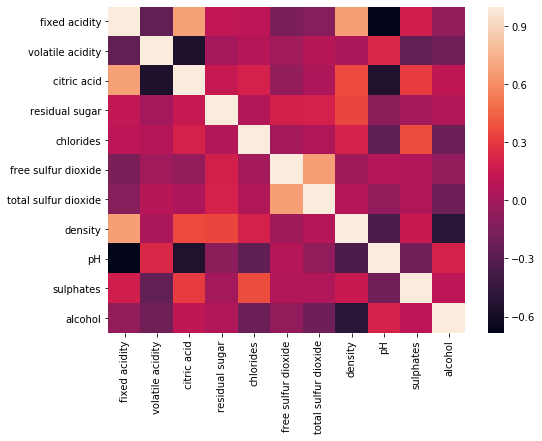

In [22]:
#Plottinf the heatmap of the corelation-coefficient matrix.
plt.figure(figsize=(8,6))
ax=sns.heatmap(wine.corr())
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

# Here we can see that thre is no high corelation that can create problem.

(3665.5, -0.5)

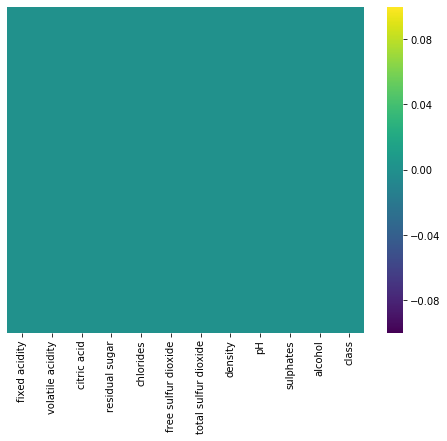

In [23]:
# Ckeck if null values are present
plt.figure(figsize=(8,6))
ax=sns.heatmap(wine_cleaned.isnull(),yticklabels=False,cmap='viridis')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

# So thre are no null values present in our dataset.

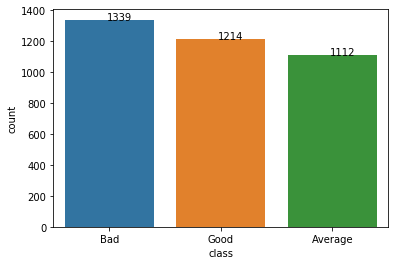

In [24]:
# Checking number of observations for each class.

ax = sns.countplot(wine_cleaned["class"], 
                   order = wine_cleaned["class"].value_counts().index)

for p, label in zip(ax.patches, wine_cleaned["class"].value_counts()):
    ax.annotate(label, (p.get_x()+0.375, p.get_height()+0.15))

# So the dataset is fairly balanced

In [25]:
# Setting the plotting style of seaborn
sns.set_style(style='whitegrid')

* ### Monovariate Analysis

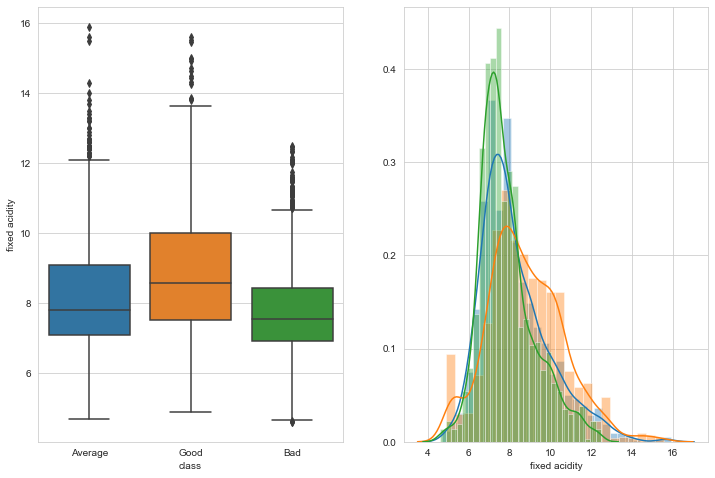

In [26]:
#Box plot and distribution plot of the feature 'fixed acidity'
f,(ax_box,ax_hist)=plt.subplots(nrows=1,ncols=2,figsize=(12,8))
sns.boxplot(data=wine_cleaned,x='class',y='fixed acidity',ax=ax_box)
sns.distplot(wine_cleaned[wine_cleaned['class']=='Average']['fixed acidity'],ax=ax_hist)
sns.distplot(wine_cleaned[wine_cleaned['class']=='Good']['fixed acidity'],ax=ax_hist)
sns.distplot(wine_cleaned[wine_cleaned['class']=='Bad']['fixed acidity'],ax=ax_hist)

#This feature is useful.

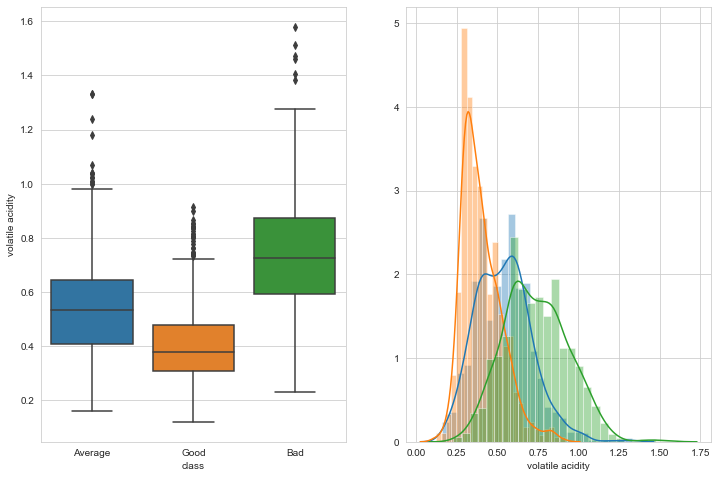

In [27]:
#Box plot and distribution plot of the feature 'volatile acidity'
f,(ax_box,ax_hist)=plt.subplots(nrows=1,ncols=2,figsize=(12,8))
sns.boxplot(data=wine_cleaned,x='class',y='volatile acidity',ax=ax_box)
sns.distplot(wine_cleaned[wine_cleaned['class']=='Average']['volatile acidity'],ax=ax_hist)
sns.distplot(wine_cleaned[wine_cleaned['class']=='Good']['volatile acidity'],ax=ax_hist)
sns.distplot(wine_cleaned[wine_cleaned['class']=='Bad']['volatile acidity'],ax=ax_hist)

#This feature is useful.

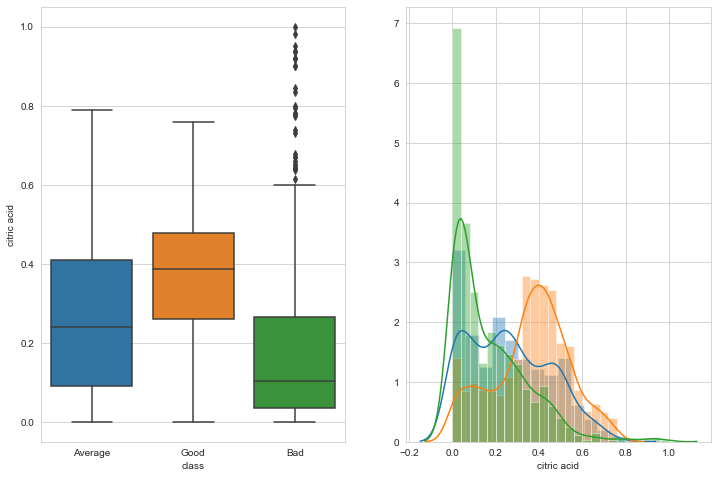

In [28]:
#Box plot and distribution plot of the feature 'citric acid'
f,(ax_box,ax_hist)=plt.subplots(nrows=1,ncols=2,figsize=(12,8))
sns.boxplot(data=wine_cleaned,x='class',y='citric acid',ax=ax_box)
sns.distplot(wine_cleaned[wine_cleaned['class']=='Average']['citric acid'],ax=ax_hist)
sns.distplot(wine_cleaned[wine_cleaned['class']=='Good']['citric acid'],ax=ax_hist)
sns.distplot(wine_cleaned[wine_cleaned['class']=='Bad']['citric acid'],ax=ax_hist)

#This feature is useful.

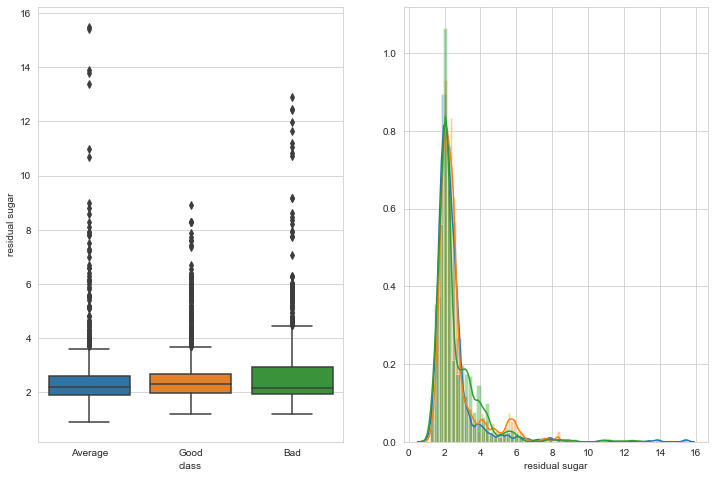

In [29]:
#Box plot and distribution plot of the feature 'residual sugar'
f,(ax_box,ax_hist)=plt.subplots(nrows=1,ncols=2,figsize=(12,8))
sns.boxplot(data=wine_cleaned,x='class',y='residual sugar',ax=ax_box)
sns.distplot(wine_cleaned[wine_cleaned['class']=='Average']['residual sugar'],ax=ax_hist)
sns.distplot(wine_cleaned[wine_cleaned['class']=='Good']['residual sugar'],ax=ax_hist)
sns.distplot(wine_cleaned[wine_cleaned['class']=='Bad']['residual sugar'],ax=ax_hist)

#This feature is not useful.

* The probability density function and mean of 'residual sugar' for all the catagories overlaps completely. so this feature will lead to misclassification. so we will drop this feature.

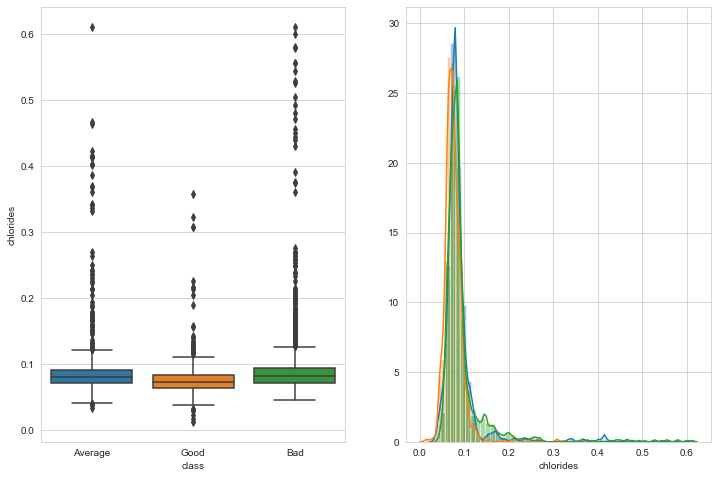

In [30]:
#Box plot and distribution plot of the feature 'chlorides'
f,(ax_box,ax_hist)=plt.subplots(nrows=1,ncols=2,figsize=(12,8))
sns.boxplot(data=wine_cleaned,x='class',y='chlorides',ax=ax_box)
sns.distplot(wine_cleaned[wine_cleaned['class']=='Average']['chlorides'],ax=ax_hist)
sns.distplot(wine_cleaned[wine_cleaned['class']=='Good']['chlorides'],ax=ax_hist)
sns.distplot(wine_cleaned[wine_cleaned['class']=='Bad']['chlorides'],ax=ax_hist)

#This feature is not useful.

* The probability density function and mean of 'chlorides' for all the catagories overlaps completely. so this feature will lead to misclassification. so we will drop this feature also.

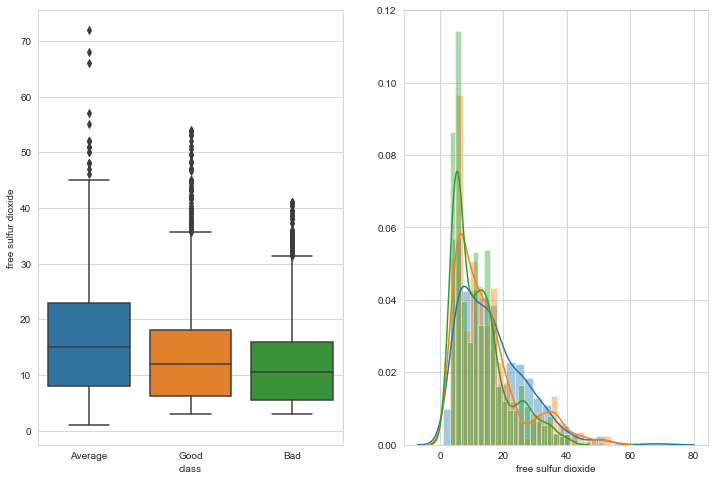

In [31]:
#Box plot and distribution plot of the feature 'free sulfur dioxide'
f,(ax_box,ax_hist)=plt.subplots(nrows=1,ncols=2,figsize=(12,8))
sns.boxplot(data=wine_cleaned,x='class',y='free sulfur dioxide',ax=ax_box)
sns.distplot(wine_cleaned[wine_cleaned['class']=='Average']['free sulfur dioxide'],ax=ax_hist)
sns.distplot(wine_cleaned[wine_cleaned['class']=='Good']['free sulfur dioxide'],ax=ax_hist)
sns.distplot(wine_cleaned[wine_cleaned['class']=='Bad']['free sulfur dioxide'],ax=ax_hist)

#This feature is useful.

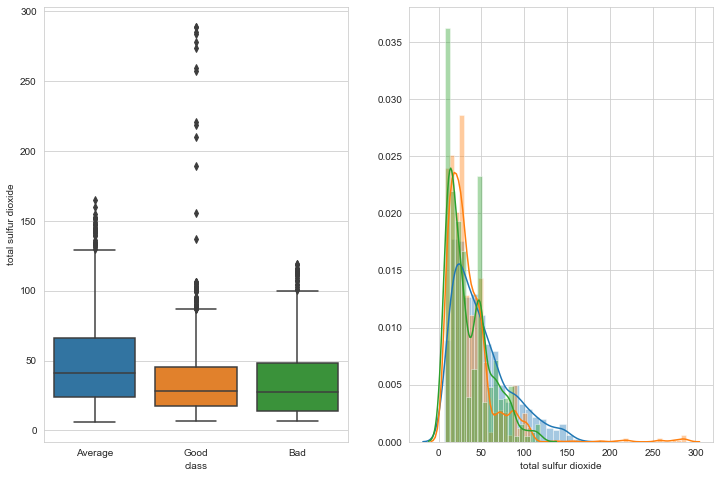

In [32]:
#Box plot and distribution plot of the feature 'total sulfur dioxide'
f,(ax_box,ax_hist)=plt.subplots(nrows=1,ncols=2,figsize=(12,8))
sns.boxplot(data=wine_cleaned,x='class',y='total sulfur dioxide',ax=ax_box)
sns.distplot(wine_cleaned[wine_cleaned['class']=='Average']['total sulfur dioxide'],ax=ax_hist)
sns.distplot(wine_cleaned[wine_cleaned['class']=='Good']['total sulfur dioxide'],ax=ax_hist)
sns.distplot(wine_cleaned[wine_cleaned['class']=='Bad']['total sulfur dioxide'],ax=ax_hist)

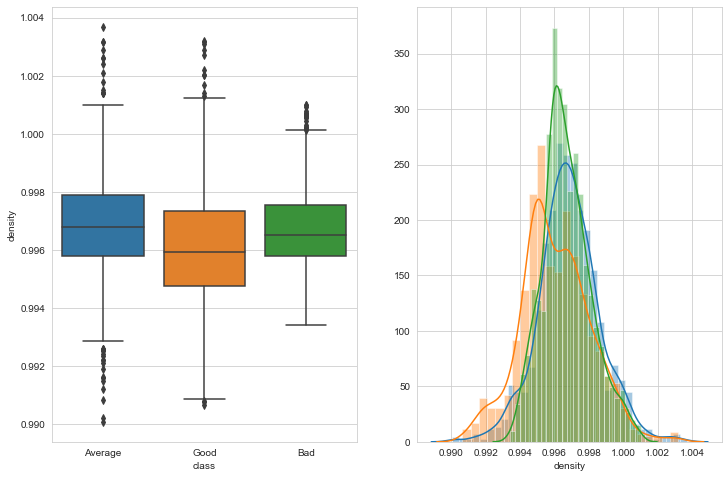

In [33]:
#Box plot and distribution plot of the feature 'density'
f,(ax_box,ax_hist)=plt.subplots(nrows=1,ncols=2,figsize=(12,8))
sns.boxplot(data=wine_cleaned,x='class',y='density',ax=ax_box)
sns.distplot(wine_cleaned[wine_cleaned['class']=='Average']['density'],ax=ax_hist)
sns.distplot(wine_cleaned[wine_cleaned['class']=='Good']['density'],ax=ax_hist)
sns.distplot(wine_cleaned[wine_cleaned['class']=='Bad']['density'],ax=ax_hist)

#This feature is useful.

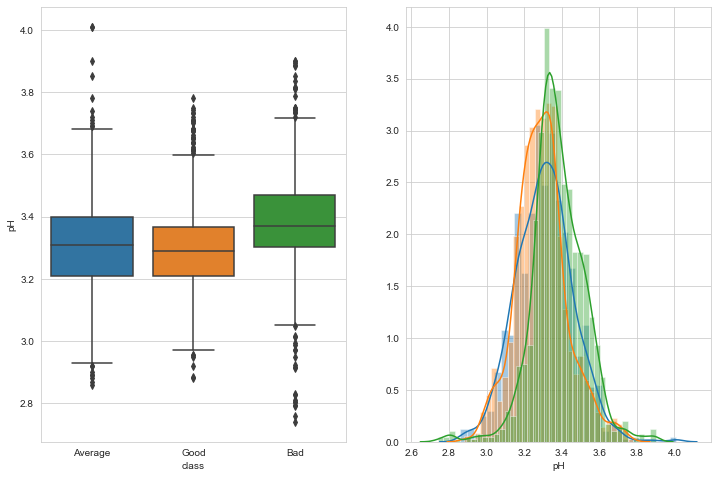

In [34]:
#Box plot and distribution plot of the feature 'pH'
f,(ax_box,ax_hist)=plt.subplots(nrows=1,ncols=2,figsize=(12,8))
sns.boxplot(data=wine_cleaned,x='class',y='pH',ax=ax_box)
sns.distplot(wine_cleaned[wine_cleaned['class']=='Average']['pH'],ax=ax_hist)
sns.distplot(wine_cleaned[wine_cleaned['class']=='Good']['pH'],ax=ax_hist)
sns.distplot(wine_cleaned[wine_cleaned['class']=='Bad']['pH'],ax=ax_hist)

#This feature is useful.

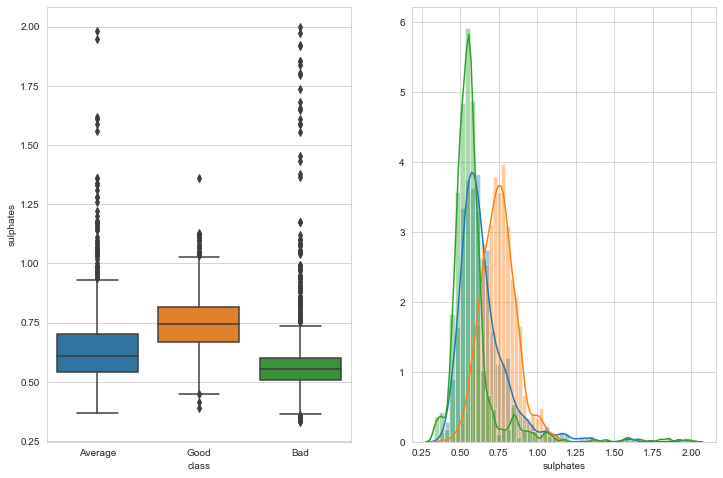

In [35]:
#Box plot and distribution plot of the feature 'sulphates'
f,(ax_box,ax_hist)=plt.subplots(nrows=1,ncols=2,figsize=(12,8))
sns.boxplot(data=wine_cleaned,x='class',y='sulphates',ax=ax_box)
sns.distplot(wine_cleaned[wine_cleaned['class']=='Average']['sulphates'],ax=ax_hist)
sns.distplot(wine_cleaned[wine_cleaned['class']=='Good']['sulphates'],ax=ax_hist)
sns.distplot(wine_cleaned[wine_cleaned['class']=='Bad']['sulphates'],ax=ax_hist)

#This feature is useful.

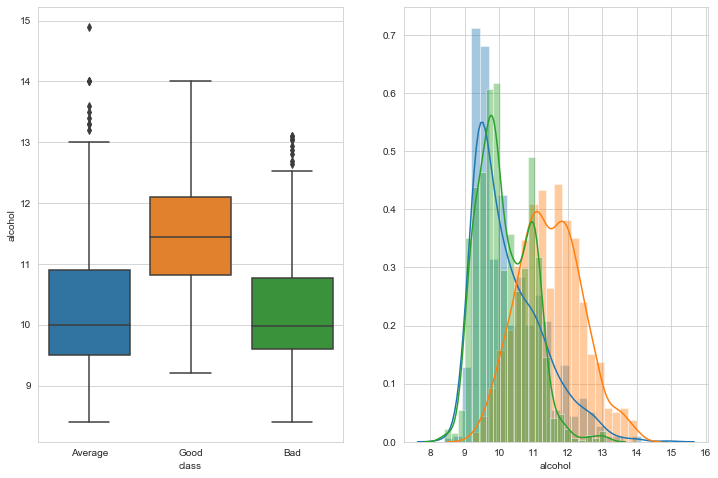

In [36]:
#Box plot and distribution plot of the feature 'alcohol'
f,(ax_box,ax_hist)=plt.subplots(nrows=1,ncols=2,figsize=(12,8))
sns.boxplot(data=wine_cleaned,x='class',y='alcohol',ax=ax_box)
sns.distplot(wine_cleaned[wine_cleaned['class']=='Average']['alcohol'],ax=ax_hist)
sns.distplot(wine_cleaned[wine_cleaned['class']=='Good']['alcohol'],ax=ax_hist)
sns.distplot(wine_cleaned[wine_cleaned['class']=='Bad']['alcohol'],ax=ax_hist)

#This feature is useful.

* ### Bivariate analysis

<Figure size 1800x1800 with 0 Axes>

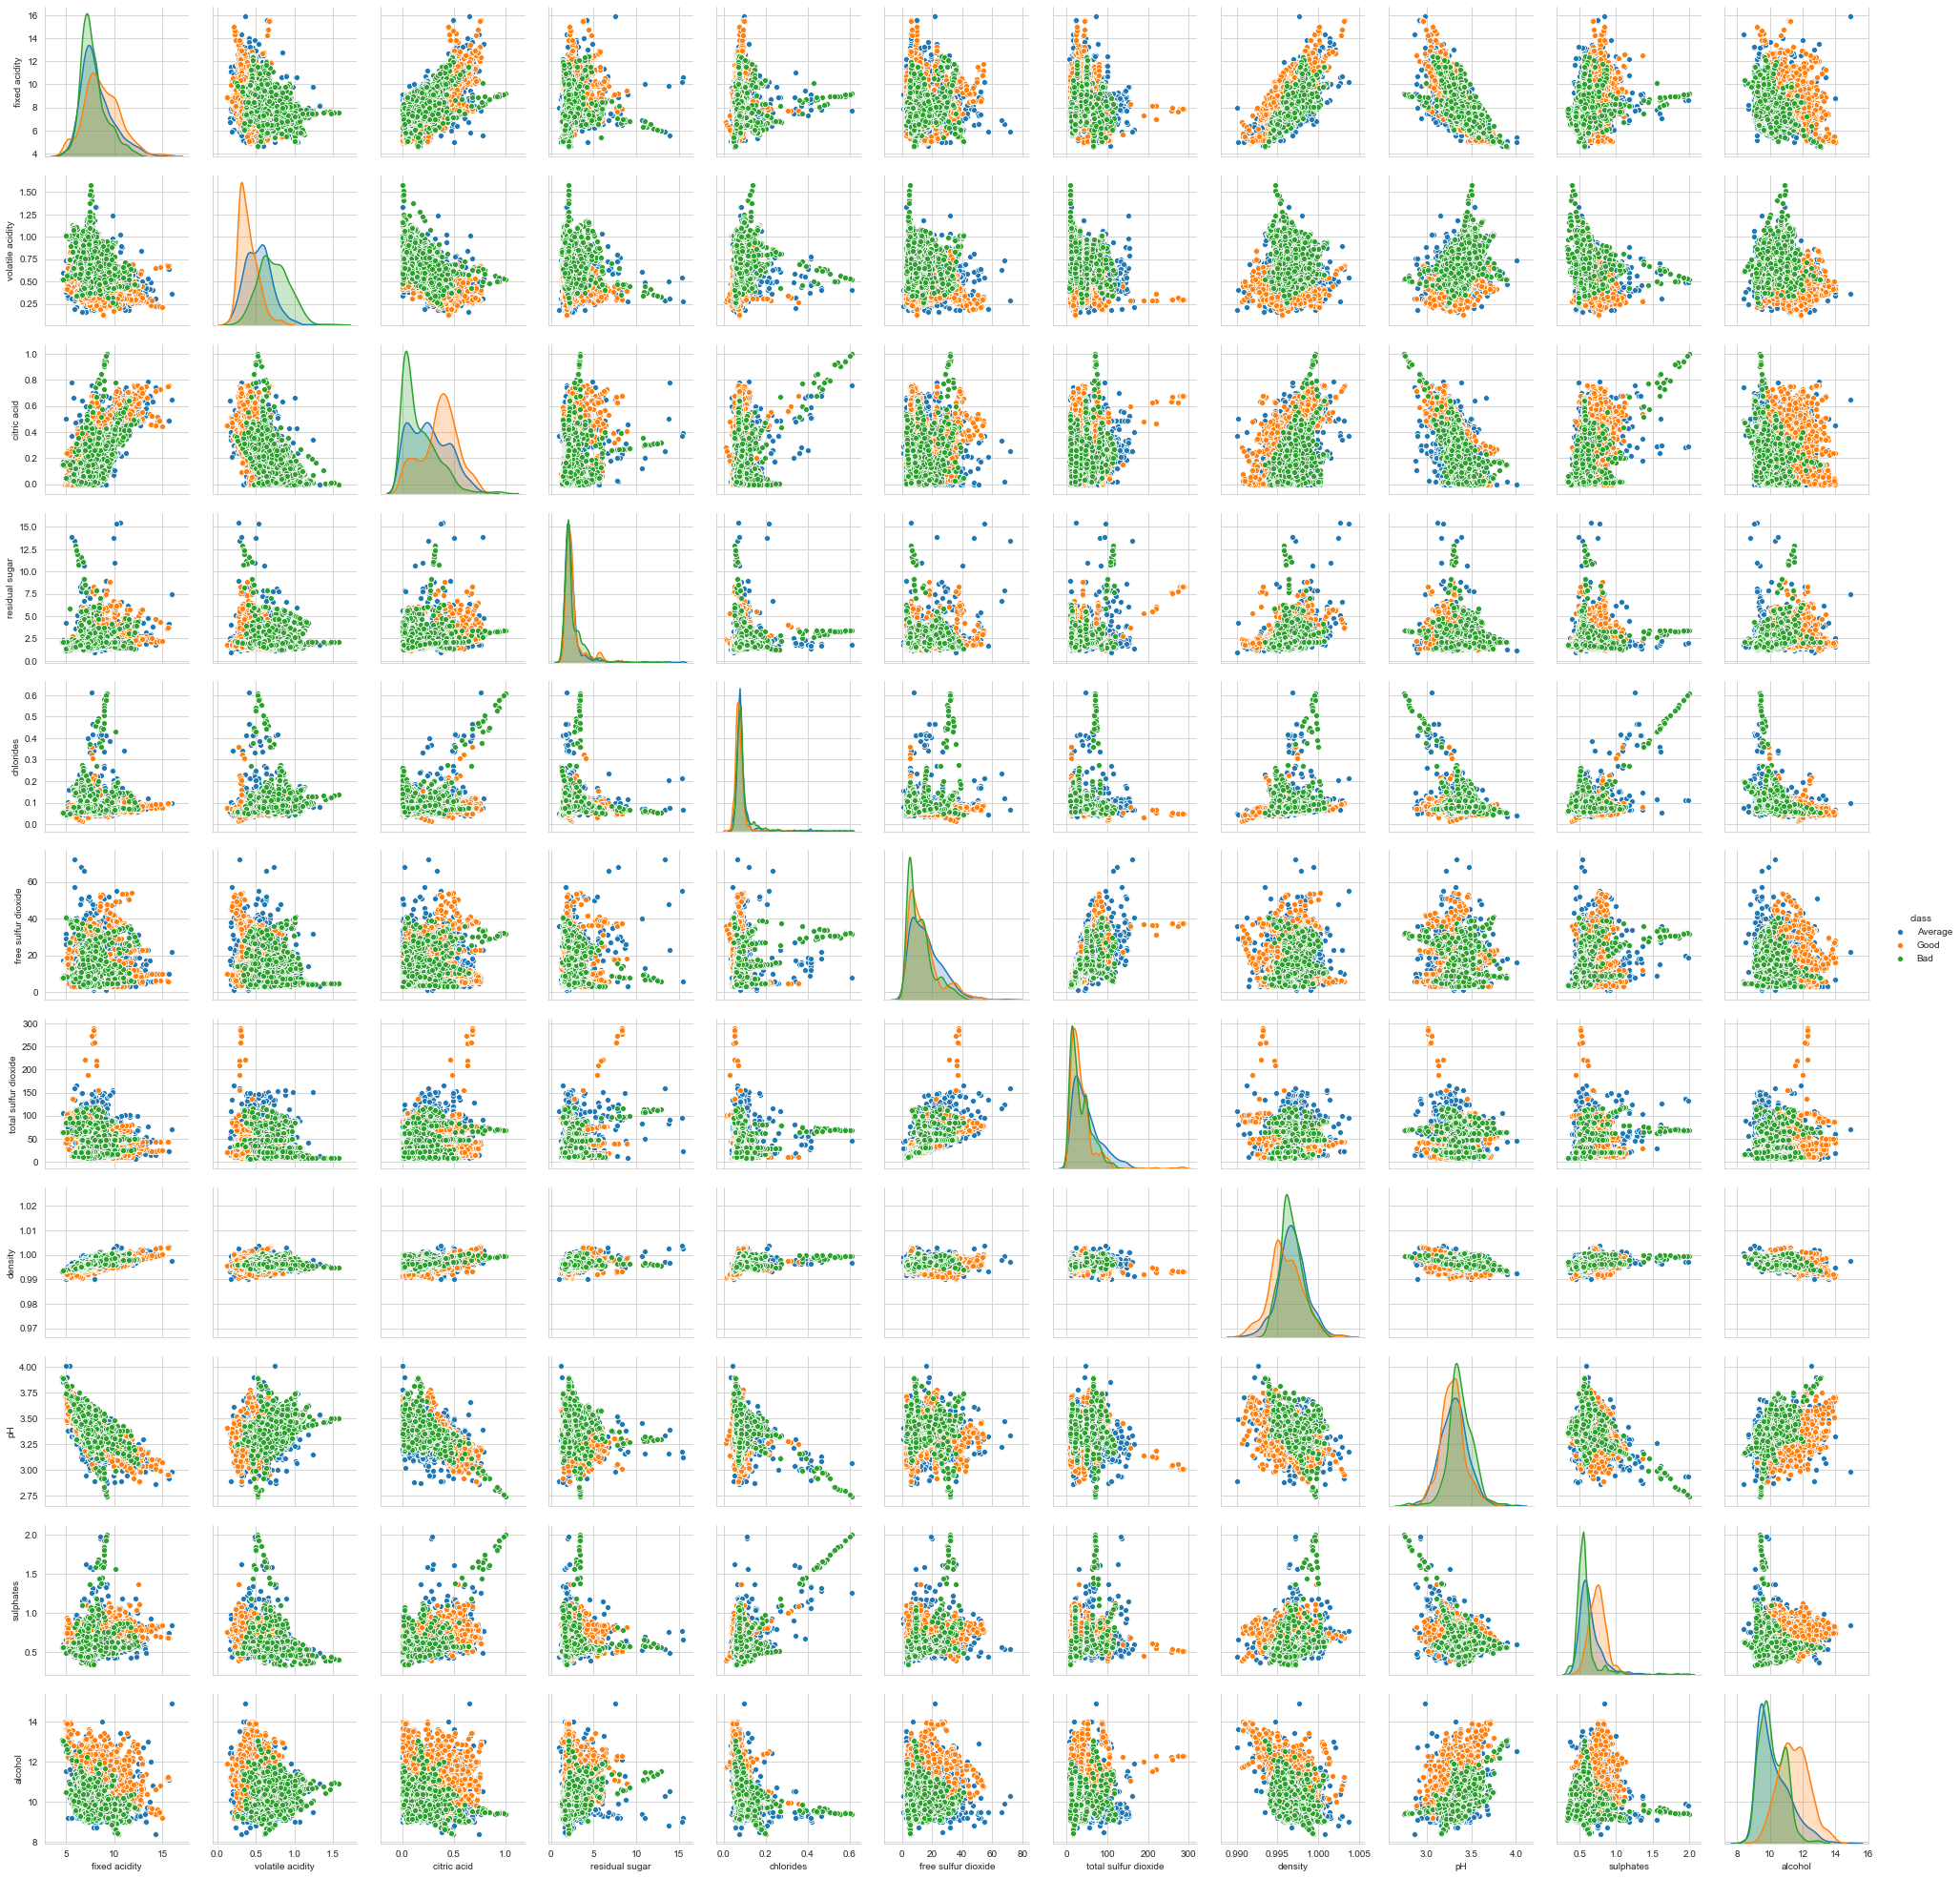

In [37]:
#plotting a pair plot of the dataset
plt.figure(figsize=(25,25))
sns.pairplot(data=wine_cleaned,hue='class')

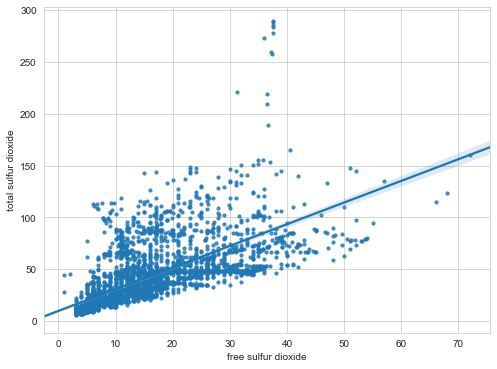

In [38]:
#From the co-relation coefficient matrix we have seen that 'total sulfur dioxide' and
# 'free sulfur dioxide' are highly co-related. let us dig into deep.
plt.figure(figsize=(8,6))
sns.regplot(data=wine_cleaned,x='free sulfur dioxide',y='total sulfur dioxide',
           scatter_kws={"s":10})

* So 'free sulfur dioxide' and 'total sulfur dioxide' are positive correlated with a coefficient value of __0.667__

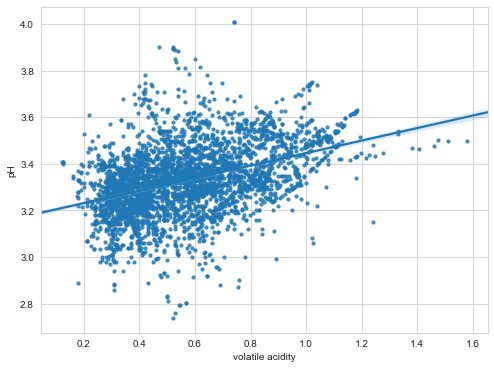

In [39]:
#Volatile acidity vs. pH
plt.figure(figsize=(8,6))
sns.regplot(data=wine_cleaned,x='volatile acidity',y='pH',
           scatter_kws={"s":10})

* Here we can see that 'volatile acidity' and 'pH' are positively correlated with a small correlation coefficient of value __0.235__

* But this is very akward. As we all knoe ph of subtances decreases as the acidity increases. This is from basic definition of pH. But here the pH increases as the acidity increases. After some investigation I found that excess amount of volatile acidity is removed from wine to reduce it's vinigar smell, using reverse osmosis technique.

[(-0.2, 1), (-0.2, 1.2)]

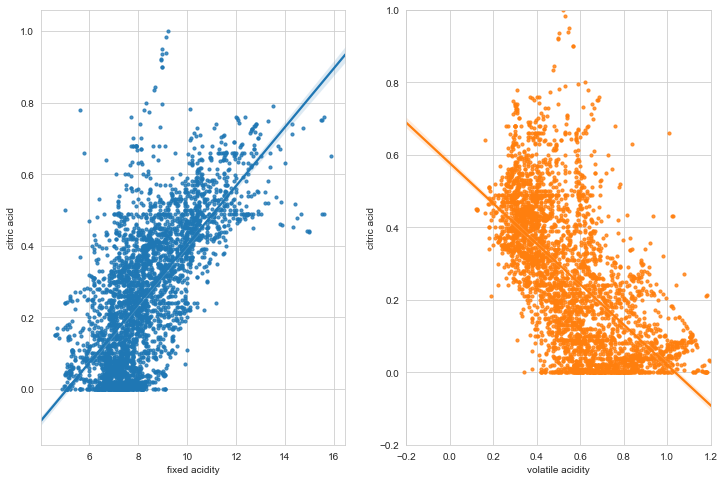

In [40]:
# Plotting 'fixed acidity' vs. 'citric acid' and 'volatile acidity' vs. 'citric acid'

f,(ax_reg1,ax_reg2)=plt.subplots(nrows=1,ncols=2,figsize=(12,8))
sns.regplot(data=wine_cleaned,x='fixed acidity',y='citric acid',
           scatter_kws={"s":10},ax=ax_reg1)

sns.regplot(data=wine_cleaned,x='volatile acidity',y='citric acid',
            scatter_kws={"s":10},ax=ax_reg2).set(xlim=(-.2,1.2),ylim=(-0.2,1))

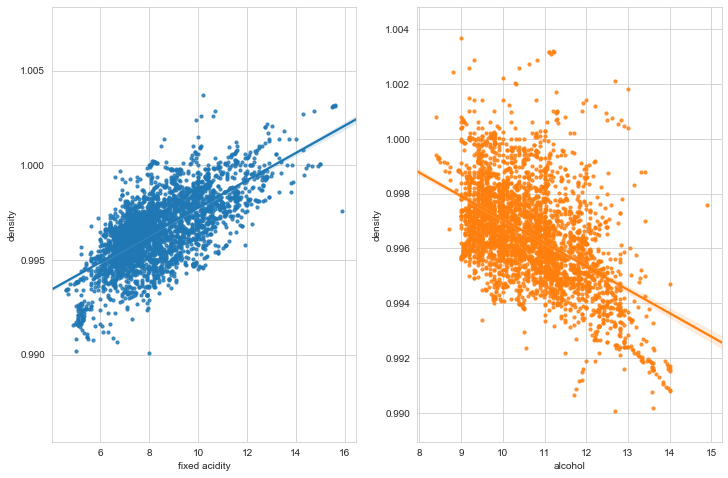

In [41]:
# Plotting 'fixed acidity' vs. 'density' and 'alcohol' vs. 'density'

f,(ax_reg1,ax_reg2)=plt.subplots(nrows=1,ncols=2,figsize=(12,8))

sns.regplot(data=wine_cleaned,x='fixed acidity',y='density',
           scatter_kws={"s":10},ax=ax_reg1)

sns.regplot(data=wine_cleaned,x='alcohol',y='density',
           scatter_kws={"s":10},ax=ax_reg2)

In [42]:
wine_cleaned.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'class'],
      dtype='object')

* ### Conclusion of Exploratory Data Analysis:



* The most important features for our classification task are: a.'fixed acidity'
                                                                b.'volatile acidity'
                                                                c.'citric acid'
                                                                d.'sulphates'
                                                                e.'alcohol'

* There are two features which we should remove to avoid 'overfitting'. these are:
                                                                a.'residual sugar'
                                                                b.'chlorides'
                                                                
* We also explored some interesting relationship between two features. For example:  ('volatile acidity' vs. 'pH'), .

* ### Data Preprocessing

In [43]:
#Dropping the features 'residual sugar' and 'chlorides'

wine_final=wine_cleaned.drop(labels=['residual sugar', 'chlorides'],axis=1)

In [44]:
#Checking the head of the dataset

wine_final.head()

,fixed acidity,volatile acidity,citric acid,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,class
0,7.4,0.70,0.00,11.0,34.0,0.9978,3.51,0.56,9.4,Average
1,7.8,0.88,0.00,25.0,67.0,0.9968,3.20,0.68,9.8,Average
2,7.8,0.76,0.04,15.0,54.0,0.9970,3.26,0.65,9.8,Average
3,11.2,0.28,0.56,17.0,60.0,0.9980,3.16,0.58,9.8,Average
5,7.4,0.66,0.00,13.0,40.0,0.9978,3.51,0.56,9.4,Average


In [45]:
# Creatting the independent and dependent variable dataframes
X=wine_final.iloc[:,:-1]
y=wine_final.iloc[:,-1]

In [46]:
#Checking the dependent variables dataframe
X.head()

,fixed acidity,volatile acidity,citric acid,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,17.0,60.0,0.9980,3.16,0.58,9.8
5,7.4,0.66,0.00,13.0,40.0,0.9978,3.51,0.56,9.4


In [47]:
#Checking the independent variables dataframe
y.head()

0    Average
1    Average
2    Average
3    Average
5    Average
Name: class, dtype: object

In [48]:
#Converting the dependent and independent dataframes to array

X=X.values

y=y.values

In [49]:
#Creating the training set and test set by splitting the dataset

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [50]:
#Ferforming Feature Scaling or column standarsization

from sklearn.preprocessing import StandardScaler

scale_x=StandardScaler()

In [51]:
#Apllying the scale to the independent array x:

X_train=scale_x.fit_transform(X_train)

X_test=scale_x.transform(X_test)

* Our Data Preprocessing stage end here and we will proceed to Building ML model.

* ### Building Machine learning model

In [52]:
# For this task we will use Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

In [53]:
#Instantiating the model

model=RandomForestClassifier(n_estimators=30,criterion="gini")

In [1]:
from xgboost import XGBClassifier

In [ ]:
model=XGBClassifier()

In [54]:
#Training the model

model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=30)

In [55]:
#Generating predictions

y_pred = model.predict(X_test)

* ### Evaluating the model

In [56]:
# We will evaluate the model based on the confusion matrix and classofication report

from sklearn.metrics import confusion_matrix,classification_report

In [57]:
#Evaluating the model

c_matrix = confusion_matrix(y_test,y_pred)

performance = classification_report(y_test,y_pred)

print("Confusion matrix: \n" , c_matrix)

print("\n\n")

print("Classification Report: \n" , performance)

Confusion matrix: 
 [[307  30  63]
 [ 12 403   0]
 [  7   1 387]]



Classification Report: 
               precision    recall  f1-score   support

     Average       0.94      0.77      0.85       400
         Bad       0.93      0.97      0.95       415
        Good       0.86      0.98      0.92       395

    accuracy                           0.91      1210
   macro avg       0.91      0.91      0.90      1210
weighted avg       0.91      0.91      0.90      1210



* So our model is performing preety well with overall accuracy of 91% 
* Accurcay per catagory is :

1. 'Average' : 94% average accuracy
2. 'Bad' : 93% average accuracy
3. 'Good' : 86% average accuracy

### So here we complete our project. 

* Outcomes: 
        1.We found the useful features for determining the quality of red wine.
        2.We explored some really interesting facts about the features of red wine.
        3.We Built a Machine Learning model which can determine the quality of red wine.

### Thank you for being patient to reach the end. Hope you enjoyed the journey.

* if you have any query or suggesation about this project please feel free to ask me through email: dasjoy498@gmail.com.